In [ ]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# stop warnings
import warnings 
warnings.filterwarnings('ignore')

In [3]:
sys.path.append('../scripts')

In [4]:
# Load the historical Tesla data
tsla_data = pd.read_csv('../data/cleaned_TSLA_data.csv')

# Display the first few rows to understand its structure
tsla_data.head()

,Date,Adj Close,Close,High,Low,Open,Volume
0,2015-01-02 00:00:00+00:00,14.620667,14.620667,14.883333,14.217333,14.858000,71466000
1,2015-01-05 00:00:00+00:00,14.006000,14.006000,14.433333,13.810667,14.303333,80527500
2,2015-01-06 00:00:00+00:00,14.085333,14.085333,14.280000,13.614000,14.004000,93928500
3,2015-01-07 00:00:00+00:00,14.063333,14.063333,14.318667,13.985333,14.223333,44526000
4,2015-01-08 00:00:00+00:00,14.041333,14.041333,14.253333,14.000667,14.187333,51637500


In [5]:
# Convert 'Date' column to datetime format
tsla_data['Date'] = pd.to_datetime(tsla_data['Date'])

# Set 'Date' as the index
tsla_data.set_index('Date', inplace=True)

# Verify the data after setting the index
tsla_data.head()

,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2015-01-02 00:00:00+00:00,14.620667,14.620667,14.883333,14.217333,14.858000,71466000
2015-01-05 00:00:00+00:00,14.006000,14.006000,14.433333,13.810667,14.303333,80527500
2015-01-06 00:00:00+00:00,14.085333,14.085333,14.280000,13.614000,14.004000,93928500
2015-01-07 00:00:00+00:00,14.063333,14.063333,14.318667,13.985333,14.223333,44526000
2015-01-08 00:00:00+00:00,14.041333,14.041333,14.253333,14.000667,14.187333,51637500


In [6]:
# Check for missing values
missing_values = tsla_data.isnull().sum()

# Display the number of missing values for each column
missing_values

Adj Close    0
Close        0
High         0
Low          0
Open         0
Volume       0
dtype: int64

In [7]:
tsla_data.columns

Index(['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')

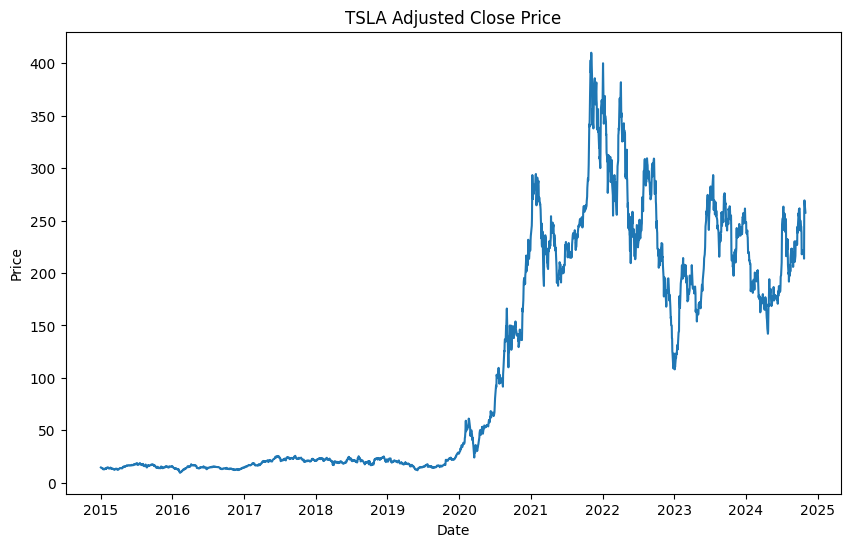

In [8]:
# Plot adjusted close prices
plt.figure(figsize=(10, 6))
plt.plot(tsla_data['Adj Close'])
plt.title('TSLA Adjusted Close Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [9]:
from statsmodels.tsa.stattools import adfuller

# Perform Augmented Dickey-Fuller test
result = adfuller(tsla_data['Adj Close'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: -1.1507672706146042
p-value: 0.6944080657685304


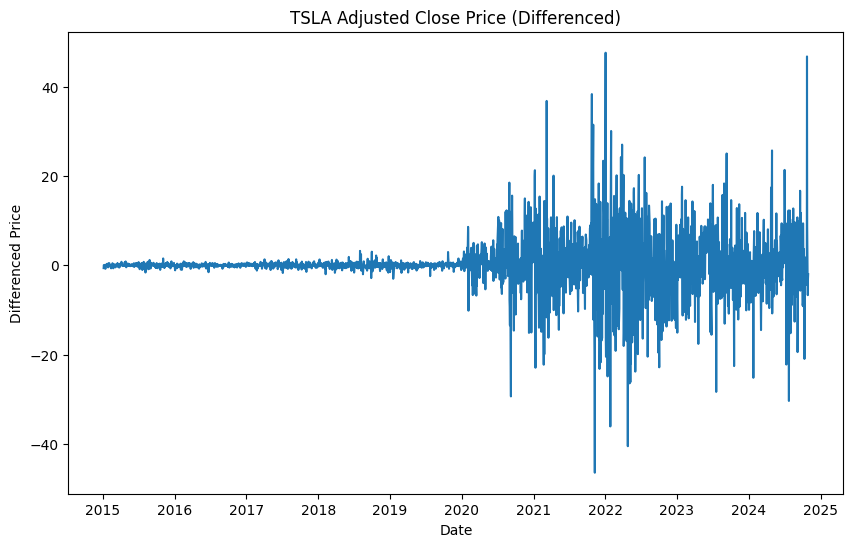

ADF Statistic: -10.08820100916535
p-value: 1.1404778247009134e-17


In [10]:
# First differencing to make the series stationary
tsla_data['Adj Close Differenced'] = tsla_data['Adj Close'].diff().dropna()

# Visualize the differenced series
plt.figure(figsize=(10, 6))
plt.plot(tsla_data['Adj Close Differenced'])
plt.title('TSLA Adjusted Close Price (Differenced)')
plt.xlabel('Date')
plt.ylabel('Differenced Price')
plt.show()

# Check stationarity again after differencing
result = adfuller(tsla_data['Adj Close Differenced'].dropna())
print('ADF Statistic:', result[0])
print('p-value:', result[1])

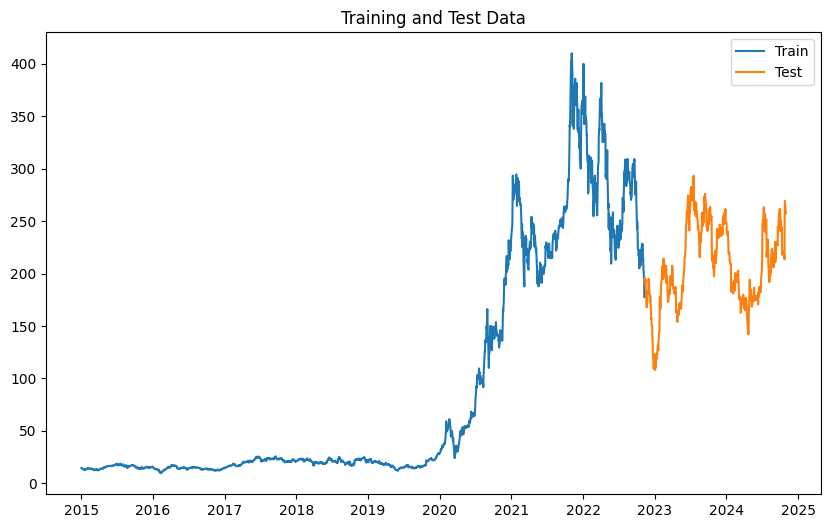

In [11]:
# Split the data into training and testing sets
train_size = int(len(tsla_data) * 0.8)  # 80% for training, 20% for testing
train, test = tsla_data['Adj Close'][:train_size], tsla_data['Adj Close'][train_size:]

# Plot the training and test data
plt.figure(figsize=(10, 6))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.legend()
plt.title('Training and Test Data')
plt.show()

                        Date  Adj Close      Close       High        Low  \
0  2015-01-02 00:00:00+00:00  14.620667  14.620667  14.883333  14.217333   
1  2015-01-05 00:00:00+00:00  14.006000  14.006000  14.433333  13.810667   
2  2015-01-06 00:00:00+00:00  14.085333  14.085333  14.280000  13.614000   
3  2015-01-07 00:00:00+00:00  14.063333  14.063333  14.318667  13.985333   
4  2015-01-08 00:00:00+00:00  14.041333  14.041333  14.253333  14.000667   

        Open    Volume  
0  14.858000  71466000  
1  14.303333  80527500  
2  14.004000  93928500  
3  14.223333  44526000  
4  14.187333  51637500  


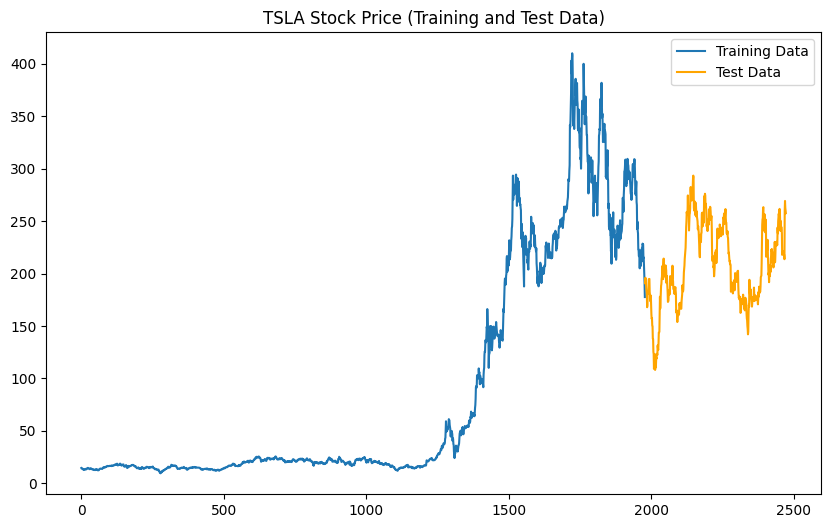

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=12345.046, Time=2.51 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=12340.889, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=12339.852, Time=0.14 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=12339.956, Time=0.53 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=12339.337, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=12341.053, Time=1.06 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 4.376 seconds
ARIMA Model Summary:
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1979
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -6168.668
Date:                Mon, 11 Nov 2024   AIC                          12339.337
Time:                        17:34:26   BIC                          12344.927
Sample:                             0   HQIC                  

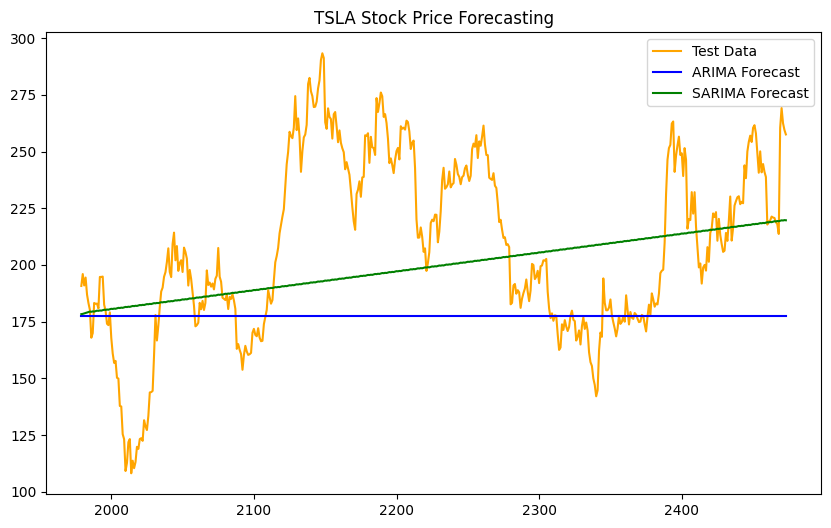

ARIMA MAE: 38.907052519827175, RMSE: 49.1129918969654, MAPE: 17.612209105913845%
SARIMA MAE: 31.108971542036564, RMSE: 38.24550825771493, MAPE: 15.178511350260596%
LSTM MAE: 0.02355798551968696, RMSE: 0.030390729564619783, MAPE: 19.591248921904423%


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
import pmdarima as pm
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import joblib

# Load the dataset
tsla_data = pd.read_csv('../data/cleaned_TSLA_data.csv')

# Display the first few rows
print(tsla_data.head())

# Step 1: Split the data into training and testing sets (80% training, 20% testing)
train_size = int(len(tsla_data) * 0.8)
train, test = tsla_data['Adj Close'][:train_size], tsla_data['Adj Close'][train_size:]

# Visualize the split
plt.figure(figsize=(10, 6))
plt.plot(tsla_data.index[:train_size], train, label='Training Data')
plt.plot(tsla_data.index[train_size:], test, label='Test Data', color='orange')
plt.legend()
plt.title('TSLA Stock Price (Training and Test Data)')
plt.show()

# Fit ARIMA model using auto_arima to find the best (p, d, q) parameters
arima_model = pm.auto_arima(train, seasonal=False, trace=True, stepwise=True)

# Print ARIMA model summary
print("ARIMA Model Summary:")
print(arima_model.summary())

# Forecast using ARIMA
arima_forecast = arima_model.predict(n_periods=len(test))

# Evaluate ARIMA performance
mae_arima = mean_absolute_error(test, arima_forecast)
rmse_arima = np.sqrt(mean_squared_error(test, arima_forecast))
mape_arima = np.mean(np.abs((test - arima_forecast) / test)) * 100


# Fit SARIMA model (example: p=1, d=1, q=1, P=1, D=1, Q=1, m=5 for weekly seasonality)
sarima_model = SARIMAX(train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 5))
sarima_model_fit = sarima_model.fit()

# Print SARIMA model summary
print("SARIMA Model Summary:")
print(sarima_model_fit.summary())

# Forecast using SARIMA
sarima_forecast = sarima_model_fit.forecast(steps=len(test))

# Evaluate SARIMA performance
mae_sarima = mean_absolute_error(test, sarima_forecast)
rmse_sarima = np.sqrt(mean_squared_error(test, sarima_forecast))
mape_sarima = np.mean(np.abs((test - sarima_forecast) / test)) * 100


# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(tsla_data['Adj Close'].values.reshape(-1, 1))

# Function to create sequences for LSTM
def create_sequences(data, seq_length=60):
    sequences = []
    labels = []
    for i in range(seq_length, len(data)):
        sequences.append(data[i-seq_length:i, 0])
        labels.append(data[i, 0])
    return np.array(sequences), np.array(labels)

# Create sequences for LSTM model
X, y = create_sequences(scaled_data)

# Split data into train and test
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Reshape for LSTM input
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Build LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the LSTM model
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Forecast using LSTM
lstm_forecast = model.predict(X_test)

# Evaluate LSTM performance
mae_lstm = mean_absolute_error(y_test, lstm_forecast)
rmse_lstm = np.sqrt(mean_squared_error(y_test, lstm_forecast))
mape_lstm = np.mean(np.abs((y_test - lstm_forecast) / y_test)) * 100


plt.figure(figsize=(10, 6))
plt.plot(tsla_data.index[train_size:], test, label='Test Data', color='orange')
plt.plot(tsla_data.index[train_size:], arima_forecast, label='ARIMA Forecast', color='blue')
plt.plot(tsla_data.index[train_size:], sarima_forecast, label='SARIMA Forecast', color='green')
plt.legend()
plt.title('TSLA Stock Price Forecasting')
plt.show()

print(f"ARIMA MAE: {mae_arima}, RMSE: {rmse_arima}, MAPE: {mape_arima}%")
print(f"SARIMA MAE: {mae_sarima}, RMSE: {rmse_sarima}, MAPE: {mape_sarima}%")
print(f"LSTM MAE: {mae_lstm}, RMSE: {rmse_lstm}, MAPE: {mape_lstm}%")

# Save ARIMA model
joblib.dump(arima_model, 'arima_model.pkl')

# Save SARIMA model
sarima_model_fit.save('sarima_model.pkl')

# Save LSTM model
model.save('lstm_model.h5')


Forecasted Tesla stock data saved as forecasted_tsla.csv


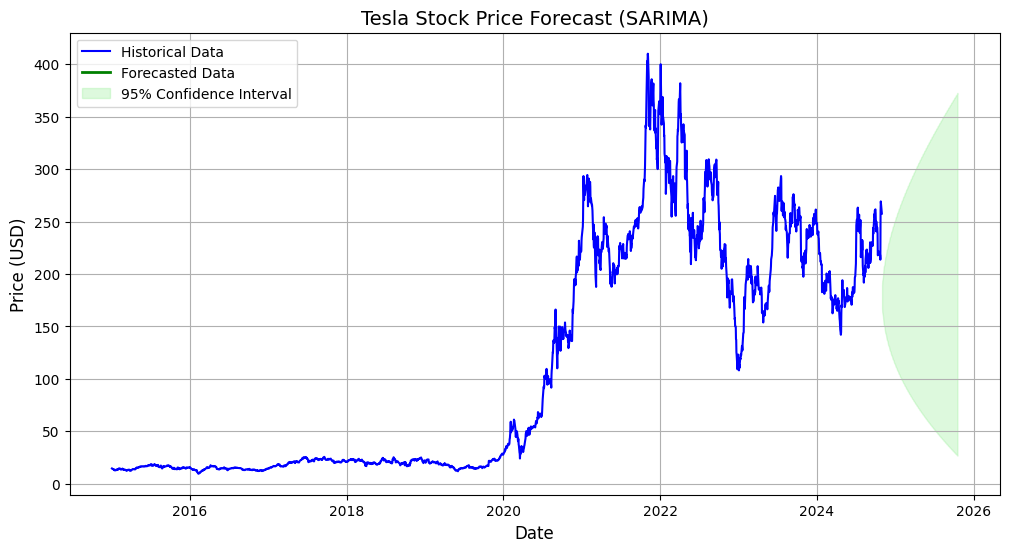

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAXResults

# Step 1: Load the data
# Assuming you have a DataFrame named 'df' with Tesla stock data, indexed by Date.
df = pd.read_csv('../data/cleaned_TSLA_data.csv', parse_dates=['Date'], index_col='Date')

# Step 2: Load the trained SARIMA model (replace path with the actual location of your model)
sarima_model = SARIMAXResults.load('../models/sarima_model.pkl')

# Step 3: Forecast Future Prices
forecast_periods = 252  # Forecast for 1 year (252 business days)
forecast_object = sarima_model.get_forecast(steps=forecast_periods)
forecast_values = forecast_object.predicted_mean
conf_int = forecast_object.conf_int(alpha=0.05)  # 95% confidence intervals

# Step 4: Create a DataFrame for the forecasted values
forecast_index = pd.date_range(start=df.index[-1] + pd.Timedelta(days=1), periods=forecast_periods, freq='B')  # Business days
forecast_df = pd.DataFrame(forecast_values, index=forecast_index, columns=['Forecast'])

# Step 5: Save the forecasted data to a CSV file
forecast_df.to_csv('../data/forecasted_tsla.csv')
print("Forecasted Tesla stock data saved as forecasted_tsla.csv")

# Step 6: Plotting the Historical Data and Forecasted Data
plt.figure(figsize=(12, 6))

# Plot the historical stock prices
plt.plot(df.index, df['Adj Close'], label='Historical Data', color='blue', linewidth=1.5)

# Plot the forecasted stock prices with thicker line width and green color
plt.plot(forecast_df.index, forecast_df['Forecast'], label='Forecasted Data', color='green', linewidth=2)

# Plot the confidence intervals with a slight transparency
plt.fill_between(forecast_df.index, 
                 conf_int.iloc[:, 0], 
                 conf_int.iloc[:, 1], 
                 color='lightgreen', alpha=0.3, label='95% Confidence Interval')

# Step 7: Add labels and title
plt.title('Tesla Stock Price Forecast (SARIMA)', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price (USD)', fontsize=12)
plt.legend()
plt.grid(True)

# Step 8: Show the plot
plt.show()